# Consignes Projet 5

Vous êtes consultant pour [Olist](https://olist.com/), une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

La page d'accueil du site Olist

**Olist** souhaite que vous fournissiez à ses équipes d'e-commerce une **segmentation des clients** qu'elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de **comprendre les différents types d'utilisateurs** grâce à leur comportement et à leurs données personnelles.

Vous devrez **fournir à l'équipe marketing une description actionable** de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu'une **proposition de contrat de maintenance** basée sur une analyse de la stabilité des segments au cours du temps.

## Les données

Pour cette mission, Olist vous fournit une [base de données](https://www.kaggle.com/olistbr/brazilian-ecommerce) anonymisée comportant des informations sur l'historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

## Votre mission

Votre mission est d'aider les équipes d'Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l'équipe Marketing pour mieux communiquer.

Vous créez donc un notebook et démarrez votre travail d'analyse exploratoire.

Vous réalisez donc trois autres documents afin de préparer une réponse à Olist : 

-   un notebook avec des essais des différentes approches de modélisation ;
-   un notebook de simulation pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation, afin que celui-ci reste pertinent ;
-   une présentation pour un collègue afin d'obtenir ses retours sur votre approche.

## Livrables

-   Un **notebook de l'analyse exploratoire** (non cleané, pour comprendre votre démarche)
-   Un **notebook** (ou code commenté au choix) **d'essais** des différentes approches de modélisation (non cleané, pour comprendre votre démarche)
-   Un **notebook de simulation pour déterminer la fréquence nécessaire de mise à jour** du modèle de segmentation
-   Un **support de présentation** pour présenter votre travail à un collègue.

# Sommaire

[Analyse des données]("## Analyse des données")

## Importation des bibliothèques

In [ ]:
# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install duckdb

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import duckdb as ddb

In [8]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 0f437949513225922d851e9581723d82120684a6
python           : 3.11.3.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 22.5.0
Version          : Darwin Kernel Version 22.5.0: Thu Jun  8 22:22:20 PDT 2023; root:xnu-8796.121.3~7/RELEASE_ARM64_T6000
machine          : arm64
processor        : arm
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.UTF-8

pandas           : 2.0.3
numpy            : 1.24.3
pytz             : 2023.3
dateutil         : 2.8.2
setuptools       : 67.6.1
pip              : 23.2
Cython           : 0.29.34
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : 3.1.2
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.11.0
pandas_datareader: None
bs4              : 4.11.

## Fonctions

In [9]:
def detailed_describe(df):
    print('*** *** ***')
    print(df.attrs['name'])
    print('*** *** ***')
    print(df.head())
    print(customers.isnull().sum())
    numeric_columns = df.select_dtypes(include=np.number)
    if not numeric_columns.empty:
        print(numeric_columns.describe())
        print(numeric_columns.isna().sum())
    print(df.shape)
    print('')
    print('')

# Importation des données

In [10]:
customers = pd.read_csv("data/olist_customers_dataset.csv")
geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")
order_items = pd.read_csv("data/olist_order_items_dataset.csv")
order_payments = pd.read_csv("data/olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
orders = pd.read_csv("data/olist_orders_dataset.csv")
products = pd.read_csv("data/olist_products_dataset.csv")
sellers = pd.read_csv("data/olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")

customers.attrs['name'] = "customers"
geolocation.attrs['name'] = "geolocation"
order_items.attrs['name'] = "order_items"
order_payments.attrs['name'] = "order_payments"
order_reviews.attrs['name'] = "order_reviews"
orders.attrs['name'] = "orders"
products.attrs['name'] = "products"
sellers.attrs['name'] = "sellers"
product_category_name_translation.attrs['name'] = "product_category_name_translation"


## Analyse des données

In [11]:
detailed_describe(customers)
detailed_describe(geolocation)
detailed_describe(order_items)
detailed_describe(order_payments)
detailed_describe(order_reviews)
detailed_describe(orders)
detailed_describe(products)
detailed_describe(sellers)
detailed_describe(product_category_name_translation)

*** *** ***
customers
*** *** ***
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0

In [12]:
customers['customer_id'].unique().shape

(99441,)

In [13]:
customers['customer_unique_id'].unique().shape

(96096,)

In [14]:
customer_ids = customers['customer_id'].unique().shape[0]
customer_unique_ids = customers['customer_unique_id'].unique().shape[0]
print('Ecart : ', np.round(100 * (customer_ids - customer_unique_ids) / customer_ids, 2), '%')

Ecart :  3.36 %


### Customer ID et Customer unique ID

La variable `customer_unique_id` représente l'idenfiant du client. 

La variable `customer_id` représente le code du client attribué à la commande. 

On retrouve ici l'écart de 3%, correspondant aux clients ayant passé plusieurs commandes. 


In [41]:
total_payment_by_order = ddb.query(
    """
    SELECT
        COUNT(DISTINCT c.customer_id) as customers,
        SUM(payment_value) as total_payment,
        COUNT(DISTINCT o.order_id) as orders
    FROM customers as c
    JOIN orders as o on c.customer_id = o.customer_id
    JOIN order_payments as p on o.order_id = p.order_id
    GROUP BY customer_unique_id
    """
).to_df()

total_payment_by_order.isnull().sum()

# total_payment_by_order = customers_payments.groupby('customer_unique_id').agg(
#     customers=pd.NameAgg(column="customer_unique_id", aggfunc="count"),
#     total_value=pd.NameAgg(column="payment_value", aggfunc="sum"),
#     orders=pd.NameAgg(column="order_id", aggfunc="count"),
# )


customers        0
total_payment    0
orders           0
dtype: int64

<Figure size 640x480 with 0 Axes>

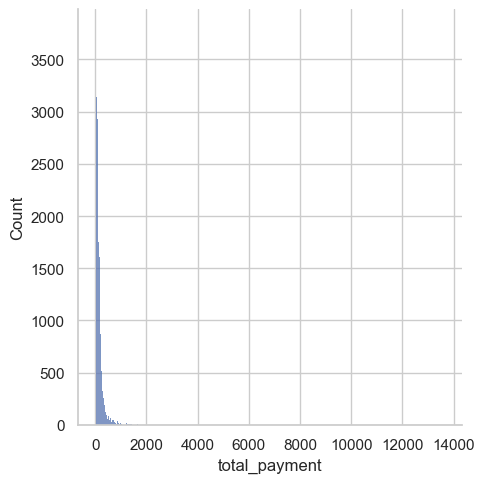

<Figure size 640x480 with 0 Axes>

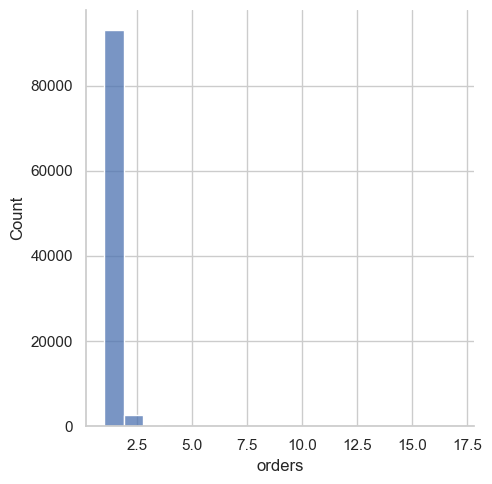

<Figure size 640x480 with 0 Axes>

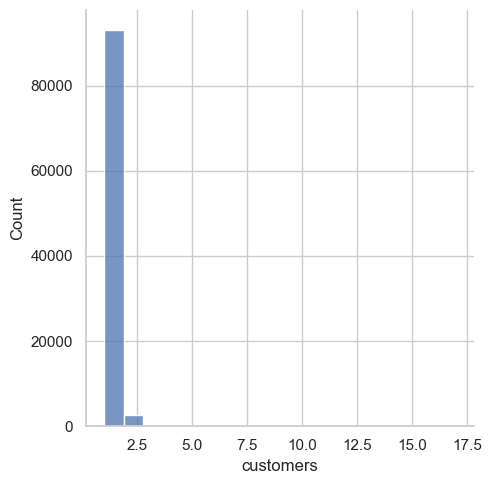

In [43]:
plt.figure()
sns.displot(data=total_payment_by_order['total_payment'])
plt.figure()
sns.displot(data=total_payment_by_order['orders'])
plt.figure()
sns.displot(data=total_payment_by_order['customers'])

/var/folders/15/b8vrvtf578n4r4drrlrq7xpc0000gn/T/ipykernel_6034/842435702.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


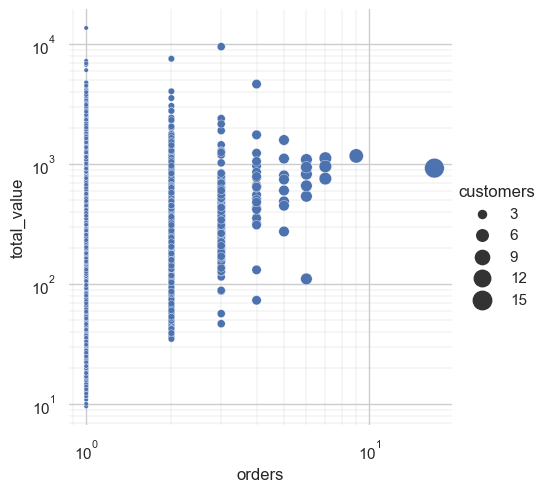

In [37]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=total_payment_by_order,
    x="orders", 
    y="total_value",
    # hue="year", 
    size="customers",
    palette=cmap, 
    sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)